In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Path to your dataset
dataset_path = r"C:\Users\sumit\OneDrive\Desktop\waste-classification\garbage-dataset"

# Get all class folders
classes = sorted(os.listdir(dataset_path))
print("Classes found:", classes)
print("Total number of classes:", len(classes))

Classes found: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Total number of classes: 10


In [3]:
for cls in classes:
    folder = os.path.join(dataset_path, cls)
    num_images = len(os.listdir(folder))
    print(f"{cls}: {num_images} images")

battery: 944 images
biological: 997 images
cardboard: 1825 images
clothes: 5327 images
glass: 3061 images
metal: 1020 images
paper: 1680 images
plastic: 1984 images
shoes: 1977 images
trash: 947 images


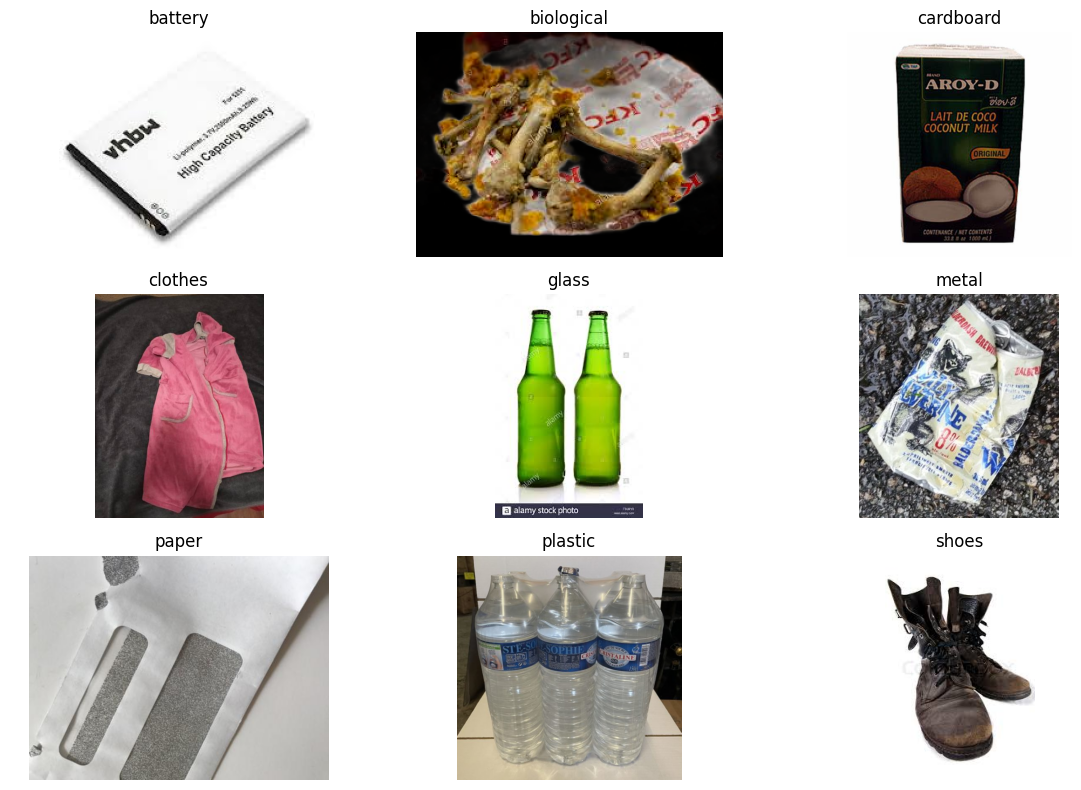

In [4]:
plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes[:9]):  # show first 9 classes
    folder = os.path.join(dataset_path, cls)
    images = os.listdir(folder)
    img_path = os.path.join(folder, images[0])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
sizes = []
for cls in classes:
    folder = os.path.join(dataset_path, cls)
    for img_name in os.listdir(folder)[:50]:  # first 50 images per class
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w = img.shape[:2]
            sizes.append((w, h))

sizes = np.array(sizes)
print("Average width:", np.mean(sizes[:,0]))
print("Average height:", np.mean(sizes[:,1]))
print("Checked images:", len(sizes))

Average width: 396.304
Average height: 377.146
Checked images: 500


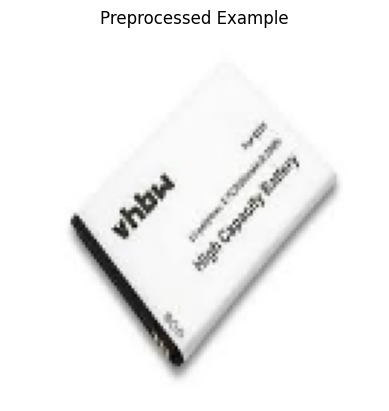

In [6]:
def preprocess_image(img_path, target_size=(128,128)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # normalize
    return img

# Test the function on one image
sample_path = os.path.join(dataset_path, classes[0], os.listdir(os.path.join(dataset_path, classes[0]))[0])
processed_img = preprocess_image(sample_path)

plt.imshow(processed_img)
plt.title("Preprocessed Example")
plt.axis('off')
plt.show()


In [7]:
image_paths = []
labels = []

for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_path, cls)
    for file in os.listdir(folder):
        image_paths.append(os.path.join(folder, file))
        labels.append(idx)

print("Total images:", len(image_paths))
print("Total labels:", len(labels))


Total images: 19762
Total labels: 19762


In [8]:
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

print("Training samples:", len(train_paths))
print("Validation samples:", len(val_paths))


Training samples: 15809
Validation samples: 3953


In [9]:
print("✅ WEEK 1 COMPLETED!")
print("• Dataset Loaded Successfully")
print("• Classes Identified:", classes)
print("• Sample Images Displayed")
print("• Image Sizes Checked")
print("• Preprocessing Function Ready")
print("• Train/Validation Split Created")


✅ WEEK 1 COMPLETED!
• Dataset Loaded Successfully
• Classes Identified: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
• Sample Images Displayed
• Image Sizes Checked
• Preprocessing Function Ready
• Train/Validation Split Created


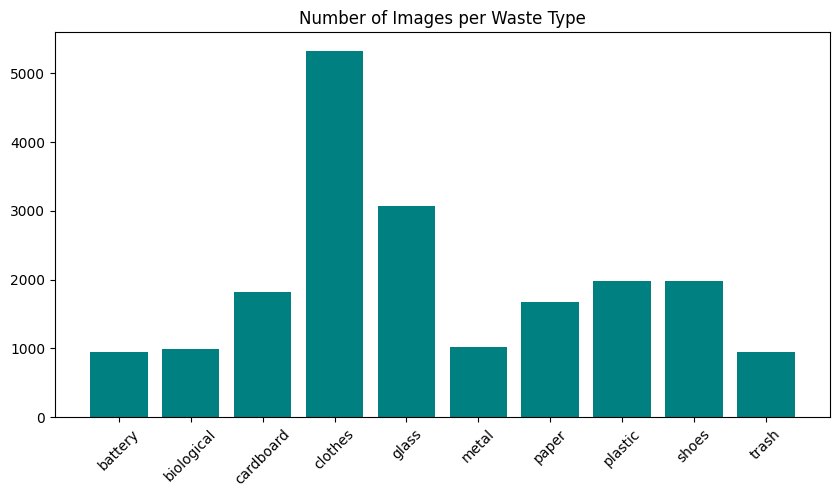

In [10]:
counts = [len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes]
plt.figure(figsize=(10,5))
plt.bar(classes, counts, color='teal')
plt.xticks(rotation=45)
plt.title("Number of Images per Waste Type")
plt.show()
